In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 120

### (1)

In [2]:
def solve_coef(grid, der):
    #b
    b = np.zeros(3)
    b[der] = 1
    
    #A
    diff = np.array([grid[0] - grid[1], 0, grid[2] - grid[1]])
    A = np.vstack((np.ones(3), diff, diff**2 / 2))
    
    return np.linalg.solve(A,b)       

In [3]:
def get_coef(grid):
    #initialize
    M = len(grid)
    d_coef = np.empty((3, M-2))
    d2_coef = np.empty((3, M-2))
    
    #get coefficients for derivatives
    for j in range(M-2):
        d_coef[:, j] = solve_coef(grid[j:j+3], 1)
        d2_coef[:, j] = solve_coef(grid[j:j+3], 2)
        
    return d_coef, d2_coef

In [4]:
def fun(U, d_coef, d2_coef, alpha, beta, eps):
    #derivatives
    du = d_coef[0,:]*U[0:-2] + d_coef[1,:]*U[1:-1] + d_coef[2,:]*U[2:]
    d2u = d2_coef[0,:]*U[0:-2] + d2_coef[1,:]*U[1:-1] + d2_coef[2,:]*U[2:]
    
    #solve
    out = U.copy()
    out[0] -= alpha
    out[1:-1] = eps*d2u + U[1:-1]*(du - 1)
    out[-1] -= beta
    
    return out    

In [5]:
def newton(f, df, x, tol=1e-10):
    #initialize
    diff = np.inf
    fval = f(x)
    x_old = x.copy()
    
    #iterate
    while diff > tol:
        x -= np.linalg.solve(df(x), fval)
        fval = f(x)
        diff = np.linalg.norm(x - x_old)
        x_old = x.copy()
        
    return x   

In [6]:
def jacobian(U, d_coef, d2_coef, alpha, beta, eps):
    #initialize
    N = len(U)
    out = np.zeros((N, N))
    out[0,0] = 1
    out[-1,-1] = 1
    
    #solve
    du = d_coef[0,:]*U[0:-2] + d_coef[1,:]*U[1:-1] + d_coef[2,:]*U[2:]
    for j in range(1,N-1):
        out[j,j-1] = eps*d2_coef[0,j-1] + U[j]*d_coef[0,j-1]
        out[j,j] = eps*d2_coef[1,j-1] + U[j]*d_coef[1,j-1] + du[j-1] - 1
        out[j,j+1] = eps*d2_coef[2,j-1] + U[j]*d_coef[2,j-1]
        
    return out

In [7]:
def solver(alpha, a, beta, b, guess):
    #get coefficients
    d_coef, d2_coef = get_coef(grid)
    
    #Newton's method solution
    f = lambda U: fun(U, d_coef, d2_coef, alpha, beta, eps)
    df = lambda U: jacobian(U, d_coef, d2_coef, alpha, beta, eps)
    u = newton(f, df, guess)
    
    return u

### (2)

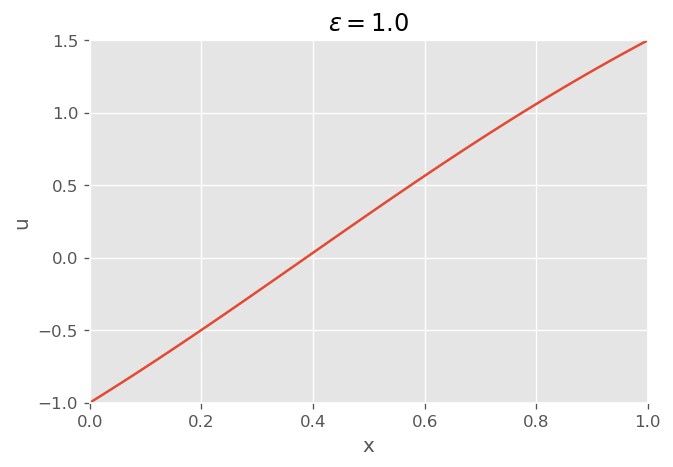

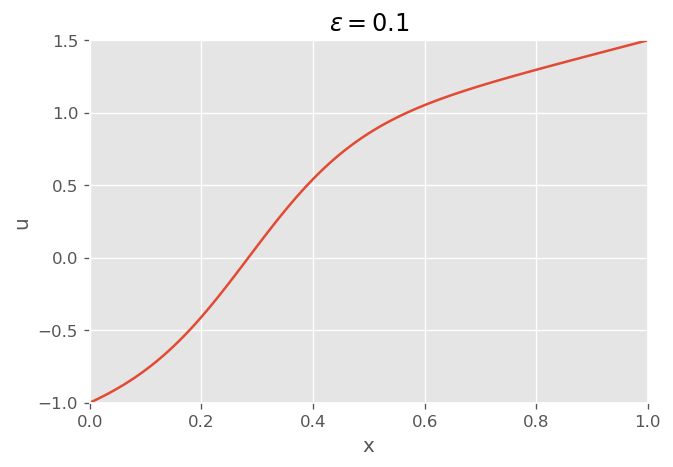

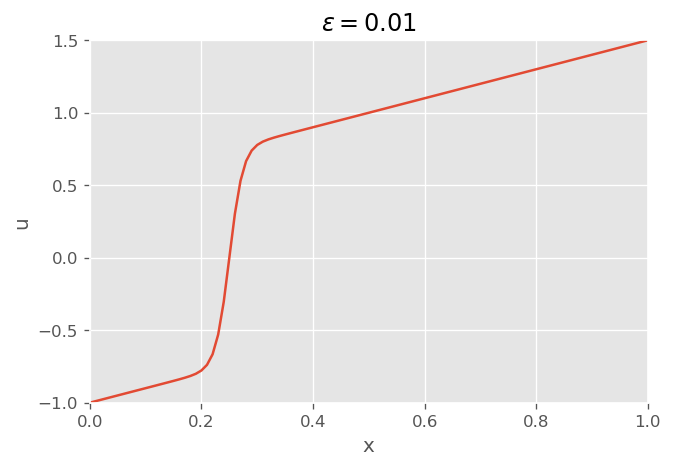

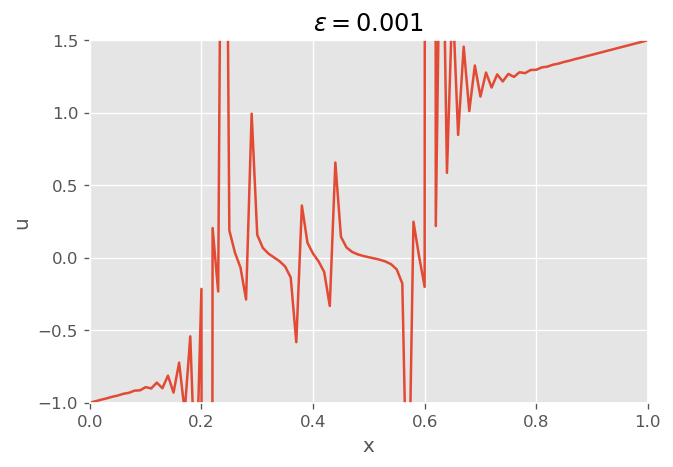

In [8]:
for eps in [1e0, 1e-1, 1e-2, 1e-3]:
    #constants
    alpha, a, beta, b = -1, 0, 3/2, 1
    del_x = 0.01
    grid = np.arange(0, 1+del_x, del_x)
    N = len(grid)

    #solve
    guess = np.linspace(alpha, beta, N)
    u = solver(alpha, a, beta, b, guess)

    #plot
    plt.title('$\epsilon = {}$'.format(eps))
    plt.plot(grid, u)
    plt.xlim(a, b)
    plt.xlabel('x')
    plt.ylim(alpha, beta)
    plt.ylabel('u')
    plt.show()

### (3)